In [4]:
import numpy as np
import skimage
import matplotlib as mp
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve
from matplotlib import rcParams
from scipy import signal

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        global img
        img = mpimg.imread(filename)
    return img

#draw circular patch of desired color
def draw_patch(Img, r, c, rad=7,col=1):   
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black   
    rr, cc = skimage.draw.circle(r, c, rad)
    Img[rr,cc, 0:3]= p  
    return Img

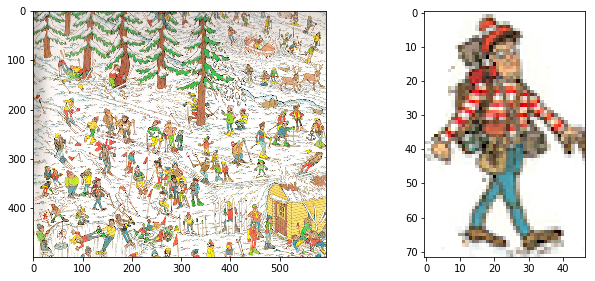

In [5]:
#1. Load the image and Waldo template
img1 = load_img('images/waldo_onIce.png')
temp1 = load_img('images/waldo_template.png')
#print(img1)

#Convert the two images to grayscale
img = skimage.color.rgb2gray(img1)
temp = skimage.color.rgb2gray(temp1)

#print(img)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

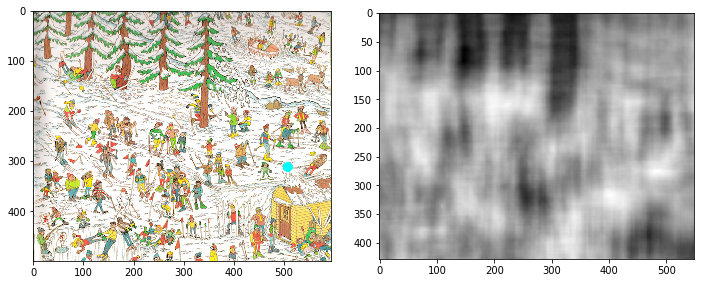

In [6]:
#2. Write and call a cross-correlation function to find the best match for Waldo
def crosscorr(Img, f):
    global corr
    corr = np.zeros((len(Img)-len(f)+1,len(Img[0]) - len(f[0])+1))
    for column in range(len(Img[0]) - len(f[0]) + 1):
        for row in range(len(Img) - len(f) + 1):
            ImgFil = Img[row:row+len(f), column:column+len(f[0])]
            corr[row][column] = np.sum(np.multiply(ImgFil, f))
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    return (y+(len(temp))/2),(x+(len(temp[0]))/2)
   
y,x = crosscorr(img,temp)
img1 = draw_patch(img1, y, x, 10, 2)

#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(corr, cmap = "gray")
fig.tight_layout()
plt.show()

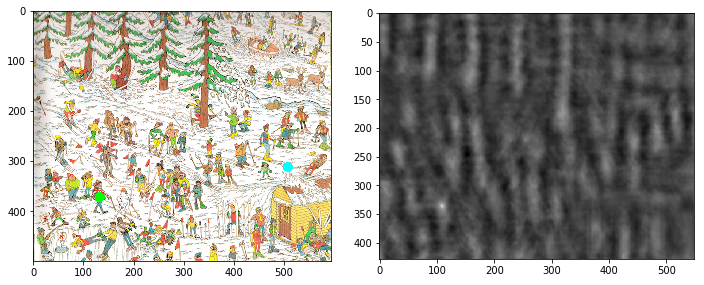

In [7]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    global corr
    Img = (Img - np.mean(Img))/(np.sqrt(np.sum((Img - np.mean(Img))**2)))
    f = (f - np.mean(f))/(np.sqrt(np.sum((f - np.mean(f))**2)))
    corr = np.zeros((len(Img)-len(f)+1,len(Img[0]) - len(f[0])+1))
    for column in range(len(Img[0]) - len(f[0]) + 1):
        for row in range(len(Img) - len(f) + 1):
            ImgFil = Img[row:row+len(f), column:column+len(f[0])]
            corr[row][column] = np.sum(np.multiply(ImgFil, f))
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    return (y+(len(temp))/2),(x+(len(temp[0]))/2)
   
y,x = normcrosscorr(img,temp)
img1 = draw_patch(img1, y, x, 10, 3)

#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(corr, cmap = "gray")
fig.tight_layout()
plt.show()

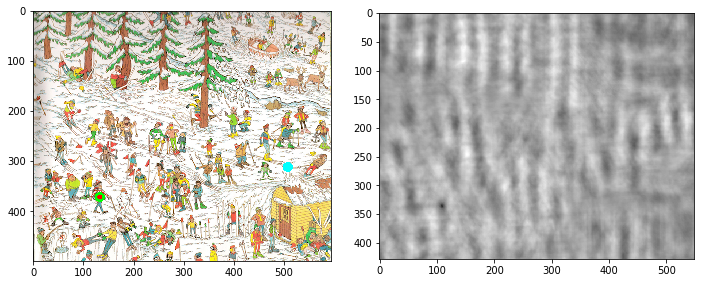

In [8]:
#6. Write and call an SSD function to find the best match for Waldo
def SSD(Img, f):
    global corr
    corr = np.zeros((len(Img)-len(f)+1,len(Img[0]) - len(f[0])+1))
    for column in range(len(Img[0]) - len(f[0]) + 1):
        for row in range(len(Img) - len(f) + 1):
            ImgFil = Img[row:row+len(f), column:column+len(f[0])]
            corr[row][column] = np.sum((np.subtract(ImgFil, f))**2)
    y, x = np.unravel_index(np.argmin(corr), corr.shape)
    return (y+(len(temp))/2),(x+(len(temp[0]))/2)
   
y,x = SSD(img,temp)
img1 = draw_patch(img1, y, x, 5, 1)
    

#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(corr, cmap = "gray")
fig.tight_layout()
plt.show()